### About Dataset

With the growing adoption of remote work, it's crucial for organizations to understand how this shift impacts employees' mental health and productivity. This dataset offers insights into the mental well-being of remote workers across different job roles, industries, and regions. It examines key factors such as work patterns, stress levels, work-life balance, and mental health conditions, providing a comprehensive view of how these elements contribute to mental health risks.

Through this dataset, organizations can predict which employees may be at risk of experiencing mental health challenges due to remote work conditions, enabling them to offer timely support and prevent potential mental health deterioration. The data includes demographic information, productivity metrics, and access to mental health resources, helping businesses create better support systems for their remote workforce.

### Problem Description

As remote work has become common, it can lead to mental health challenges due to isolation, lack of work-life balance, and burnout. This model seeks to classify which remote workers are at risk of mental health issues based on their work patterns (e.g., long working hours, lack of social interaction), demographic data, and productivity metrics. By predicting high-risk employees, organizations can offer timely support to prevent mental health deterioration.


The "Remote Work and Mental Health" dataset was chosen because it directly relates to the goal of predicting mental health risks among remote workers. It contains valuable information on work patterns, stress levels, mental health conditions, and demographic details—all of which are key factors in understanding the potential mental health challenges faced by remote employees.

These columns collectively represent the demographic, behavioral, work-related, and health-related aspects of remote workers' lives, providing a holistic view of the factors that can contribute to mental health risks.

### Import Necessary Libraries 

In [ ]:
# Data manipulation
import pandas as pd # For loading and manipulating dataset
import numpy as np # for numerical operation

# Data Visualization
import matplotlib.pyplot as plt # For creating stastic , publication-quality plots
import seaborn as sns # For advanced data visualization

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Loading the dataset
df = pd.read_csv('C:\\Users\\cash\\Downloads\\Impact_of_Remote_Work_on_Mental_Health.csv')

# Data Exploration

In [5]:
#Inspect first few rows
df.head()

Employee_ID  Age      Gender           Job_Role    Industry  \
0     EMP0001   32  Non-binary                 HR  Healthcare   
1     EMP0002   40      Female     Data Scientist          IT   
2     EMP0003   59  Non-binary  Software Engineer   Education   
3     EMP0004   27        Male  Software Engineer     Finance   
4     EMP0005   49        Male              Sales  Consulting   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                   13        Hybrid                     47   
1                    3        Remote                     52   
2                   22        Hybrid                     46   
3                   20        Onsite                     32   
4                   32        Onsite                     35   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                           7                         2       Medium   
1                           4                         1       Medium   
2                          11                         5       Medium   
3                           8                         4         High   
4                          12                         2         High   

  Mental_Health_Condition Access_to_Mental_Health_Resources  \
0              Depression                                No   
1                 Anxiety                                No   
2                 Anxiety                                No   
3              Depression                               Yes   
4                     NaN                               Yes   

  Productivity_Change  Social_Isolation_Rating Satisfaction_with_Remote_Work  \
0            Decrease                        1                   Unsatisfied   
1            Increase                        3                     Satisfied   
2           No Change                        4                   Unsatisfied   
3            Increase                        3                   Unsatisfied   
4            Decrease                        3                   Unsatisfied   

   Company_Support_for_Remote_Work Physical_Activity Sleep_Quality  \
0                                1            Weekly          Good   
1                                2            Weekly          Good   
2                                5               NaN          Poor   
3                                3               NaN          Poor   
4                                3            Weekly       Average   

          Region  
0         Europe  
1           Asia  
2  North America  
3         Europe  
4  North America

In [7]:
#Filter the dataset to keep only rows where Work_Location is Remote
df_remote=df[df['Work_Location'] == 'Remote']

#Check the filtered datase
df_remote.head()

Employee_ID  Age             Gender           Job_Role    Industry  \
1      EMP0002   40             Female     Data Scientist          IT   
6      EMP0007   31  Prefer not to say              Sales          IT   
10     EMP0011   33         Non-binary  Software Engineer     Finance   
12     EMP0013   40             Female          Marketing  Consulting   
14     EMP0015   36  Prefer not to say    Project Manager      Retail   

    Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
1                     3        Remote                     52   
6                    24        Remote                     51   
10                   17        Remote                     48   
12                    1        Remote                     21   
14                   23        Remote                     59   

    Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
1                            4                         1       Medium   
6                            7                         3          Low   
10                           3                         3         High   
12                           7                         2         High   
14                          11                         3         High   

   Mental_Health_Condition Access_to_Mental_Health_Resources  \
1                  Anxiety                                No   
6                  Anxiety                               Yes   
10                     NaN                               Yes   
12              Depression                               Yes   
14                 Anxiety                               Yes   

   Productivity_Change  Social_Isolation_Rating Satisfaction_with_Remote_Work  \
1             Increase                        3                     Satisfied   
6             Decrease                        5                       Neutral   
10            Decrease                        4                     Satisfied   
12            Decrease                        2                       Neutral   
14            Decrease                        5                       Neutral   

    Company_Support_for_Remote_Work Physical_Activity Sleep_Quality   Region  
1                                 2            Weekly          Good     Asia  
6                                 3             Daily          Poor     Asia  
10                                2            Weekly       Average  Oceania  
12                                1            Weekly          Good   Europe  
14                                3            Weekly       Average  Oceania

In [9]:
#Reset the index of the filtred Dataframe
df_remote=df_remote.reset_index(drop=True)

#check is index is reseted successfully
df_remote.head()

Employee_ID  Age             Gender           Job_Role    Industry  \
0     EMP0002   40             Female     Data Scientist          IT   
1     EMP0007   31  Prefer not to say              Sales          IT   
2     EMP0011   33         Non-binary  Software Engineer     Finance   
3     EMP0013   40             Female          Marketing  Consulting   
4     EMP0015   36  Prefer not to say    Project Manager      Retail   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                    3        Remote                     52   
1                   24        Remote                     51   
2                   17        Remote                     48   
3                    1        Remote                     21   
4                   23        Remote                     59   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                           4                         1       Medium   
1                           7                         3          Low   
2                           3                         3         High   
3                           7                         2         High   
4                          11                         3         High   

  Mental_Health_Condition Access_to_Mental_Health_Resources  \
0                 Anxiety                                No   
1                 Anxiety                               Yes   
2                     NaN                               Yes   
3              Depression                               Yes   
4                 Anxiety                               Yes   

  Productivity_Change  Social_Isolation_Rating Satisfaction_with_Remote_Work  \
0            Increase                        3                     Satisfied   
1            Decrease                        5                       Neutral   
2            Decrease                        4                     Satisfied   
3            Decrease                        2                       Neutral   
4            Decrease                        5                       Neutral   

   Company_Support_for_Remote_Work Physical_Activity Sleep_Quality   Region  
0                                2            Weekly          Good     Asia  
1                                3             Daily          Poor     Asia  
2                                2            Weekly       Average  Oceania  
3                                1            Weekly          Good   Europe  
4                                3            Weekly       Average  Oceania

In [10]:
#Inspecting the last few rows
df_remote.tail()

Employee_ID  Age             Gender           Job_Role    Industry  \
1709     EMP4973   57         Non-binary  Software Engineer     Finance   
1710     EMP4975   46               Male              Sales  Consulting   
1711     EMP4978   40               Male     Data Scientist      Retail   
1712     EMP4989   53  Prefer not to say              Sales          IT   
1713     EMP4999   27             Female              Sales  Healthcare   

      Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
1709                   11        Remote                     25   
1710                    9        Remote                     22   
1711                   19        Remote                     49   
1712                   21        Remote                     26   
1713                   26        Remote                     58   

      Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
1709                           5                         2          Low   
1710                           5                         4          Low   
1711                           7                         5       Medium   
1712                           0                         5       Medium   
1713                           0                         5          Low   

     Mental_Health_Condition Access_to_Mental_Health_Resources  \
1709                 Anxiety                                No   
1710                 Anxiety                                No   
1711                 Anxiety                               Yes   
1712                     NaN                                No   
1713                     NaN                               Yes   

     Productivity_Change  Social_Isolation_Rating  \
1709            Increase                        5   
1710            Increase                        3   
1711            Increase                        5   
1712            Increase                        3   
1713            Increase                        3   

     Satisfaction_with_Remote_Work  Company_Support_for_Remote_Work  \
1709                   Unsatisfied                                3   
1710                       Neutral                                3   
1711                   Unsatisfied                                5   
1712                       Neutral                                3   
1713                   Unsatisfied                                4   

     Physical_Activity Sleep_Quality  Region  
1709             Daily          Poor  Europe  
1710            Weekly          Poor    Asia  
1711               NaN       Average    Asia  
1712            Weekly          Poor  Africa  
1713             Daily       Average    Asia

In [11]:
#Inspecting the number of duplicates
df_duplicates = df_remote.duplicated().sum()
print(f"Number of duplicates: {df_duplicates}")

Number of duplicates: 0


In [12]:
# Inspecting the column names
df_columns = df_remote.columns
print(f"Column names:\n\n{df_columns}")

Column names:

Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')


In [13]:
# Inspecting datatypes
df_datatypes = df_remote.dtypes
print(f"Data types for each column:\n\n{df_datatypes}")

Data types for each column:

Employee_ID                          object
Age                                   int64
Gender                               object
Job_Role                             object
Industry                             object
Years_of_Experience                   int64
Work_Location                        object
Hours_Worked_Per_Week                 int64
Number_of_Virtual_Meetings            int64
Work_Life_Balance_Rating              int64
Stress_Level                         object
Mental_Health_Condition              object
Access_to_Mental_Health_Resources    object
Productivity_Change                  object
Social_Isolation_Rating               int64
Satisfaction_with_Remote_Work        object
Company_Support_for_Remote_Work       int64
Physical_Activity                    object
Sleep_Quality                        object
Region                               object
dtype: object


In [14]:
#Inspecting rows and columns
df_remote.shape

(1714, 20)

In [15]:
#Insepcting the summary of the dataset
df_remote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714 entries, 0 to 1713
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        1714 non-null   object
 1   Age                                1714 non-null   int64 
 2   Gender                             1714 non-null   object
 3   Job_Role                           1714 non-null   object
 4   Industry                           1714 non-null   object
 5   Years_of_Experience                1714 non-null   int64 
 6   Work_Location                      1714 non-null   object
 7   Hours_Worked_Per_Week              1714 non-null   int64 
 8   Number_of_Virtual_Meetings         1714 non-null   int64 
 9   Work_Life_Balance_Rating           1714 non-null   int64 
 10  Stress_Level                       1714 non-null   object
 11  Mental_Health_Condition            1294 non-null   object
 12  Access

In [16]:
#Inspecting descriptive statistics
df_remote.describe()

Age  Years_of_Experience  Hours_Worked_Per_Week  \
count  1714.000000          1714.000000            1714.000000   
mean     40.847725            17.699533              39.445741   
std      11.202255            10.007652              11.857085   
min      22.000000             1.000000              20.000000   
25%      31.000000             9.000000              29.000000   
50%      41.000000            18.000000              39.000000   
75%      50.000000            26.000000              50.000000   
max      60.000000            35.000000              60.000000   

       Number_of_Virtual_Meetings  Work_Life_Balance_Rating  \
count                 1714.000000               1714.000000   
mean                     7.642940                  2.983081   
std                      4.644607                  1.429101   
min                      0.000000                  1.000000   
25%                      4.000000                  2.000000   
50%                      8.000000                  3.000000   
75%                     12.000000                  4.000000   
max                     15.000000                  5.000000   

       Social_Isolation_Rating  Company_Support_for_Remote_Work  
count              1714.000000                      1714.000000  
mean                  2.961494                         3.043174  
std                   1.387430                         1.379697  
min                   1.000000                         1.000000  
25%                   2.000000                         2.000000  
50%                   3.000000                         3.000000  
75%                   4.000000                         4.000000  
max                   5.000000                         5.000000

In [17]:
# Inspecting the number of missing values
df_missing_values = df_remote.isnull().sum()
print(f"Number of missing values:\n\n{df_missing_values}")

Number of missing values:

Employee_ID                            0
Age                                    0
Gender                                 0
Job_Role                               0
Industry                               0
Years_of_Experience                    0
Work_Location                          0
Hours_Worked_Per_Week                  0
Number_of_Virtual_Meetings             0
Work_Life_Balance_Rating               0
Stress_Level                           0
Mental_Health_Condition              420
Access_to_Mental_Health_Resources      0
Productivity_Change                    0
Social_Isolation_Rating                0
Satisfaction_with_Remote_Work          0
Company_Support_for_Remote_Work        0
Physical_Activity                    543
Sleep_Quality                          0
Region                                 0
dtype: int64


In [20]:
#Fill the missing values in Mental health condition and physical activity with a mode
df_remote['Mental_Health_Condition'].fillna(df_remote['Mental_Health_Condition'].mode()[0],inplace=True)
df_remote['Physical_Activity'].fillna(df_remote['Physical_Activity'].mode()[0],inplace=True)

#Check if missing values are filled
print(f"Missing values in Mental_Health_Condition: {df_remote['Mental_Health_Condition'].isnull().sum()}\n\n")
print(f"Missing values in Physical_Activity: {df_remote['Physical_Activity'].isnull().sum()}")

Missing values in Mental_Health_Condition: 0


Missing values in Physical_Activity: 0


In [22]:
#Inspect the first few rows again
df_remote.head(10)

Employee_ID  Age             Gender           Job_Role    Industry  \
0     EMP0002   40             Female     Data Scientist          IT   
1     EMP0007   31  Prefer not to say              Sales          IT   
2     EMP0011   33         Non-binary  Software Engineer     Finance   
3     EMP0013   40             Female          Marketing  Consulting   
4     EMP0015   36  Prefer not to say    Project Manager      Retail   
5     EMP0016   56             Female              Sales  Healthcare   
6     EMP0019   49         Non-binary  Software Engineer          IT   
7     EMP0020   59               Male  Software Engineer  Consulting   
8     EMP0025   56               Male              Sales     Finance   
9     EMP0030   59               Male  Software Engineer  Healthcare   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                    3        Remote                     52   
1                   24        Remote                     51   
2                   17        Remote                     48   
3                    1        Remote                     21   
4                   23        Remote                     59   
5                   13        Remote                     44   
6                   30        Remote                     36   
7                   13        Remote                     59   
8                    6        Remote                     54   
9                   34        Remote                     25   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                           4                         1       Medium   
1                           7                         3          Low   
2                           3                         3         High   
3                           7                         2         High   
4                          11                         3         High   
5                          11                         4          Low   
6                           6                         1         High   
7                           4                         3       Medium   
8                          15                         3          Low   
9                          15                         2         High   

  Mental_Health_Condition Access_to_Mental_Health_Resources  \
0                 Anxiety                                No   
1                 Anxiety                               Yes   
2                 Anxiety                               Yes   
3              Depression                               Yes   
4                 Anxiety                               Yes   
5                 Anxiety                                No   
6                 Anxiety                                No   
7                 Anxiety                                No   
8                 Burnout                                No   
9              Depression                               Yes   

  Productivity_Change  Social_Isolation_Rating Satisfaction_with_Remote_Work  \
0            Increase                        3                     Satisfied   
1            Decrease                        5                       Neutral   
2            Decrease                        4                     Satisfied   
3            Decrease                        2                       Neutral   
4            Decrease                        5                       Neutral   
5           No Change                        5                     Satisfied   
6           No Change                        3                     Satisfied   
7            Decrease                        4                       Neutral   
8            Increase                        2                       Neutral   
9           No Change                        3                     Satisfied   

   Company_Support_for_Remote_Work Physical_Activity Sleep_Quality  \
0                                2            Weekly          Good   
1      

In [27]:
#Detect outliers using interquartile range
def detect_outliers(df_remote):
    numeric_columns=df_remote.select_dtypes(include=['float64','int64']).columns
    outliers_information={}

    for column in numeric_columns:
        Q1=df_remote[column].quantile(0.25)
        Q3=df_remote[column].quantile(0.75)
        IQR=Q3-Q1

        #define outlier boundaries
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5 *IQR

        #idebtify outliers
        outliers = df[(df[column]<lower_bound) | (df[column] > upper_bound)]
        outliers_information[column] = len(outliers)

        print(f"Column 'column':")
        print(f"- Lower bound: {lower_bound}")
        print(f" - Upper bound: {upper_bound} ")
        print(f" - Number of outliers: {len(outliers)}\n")
                
    return outliers_information

# Apply the function to the dataset
outliers_detected = detect_outliers(df_remote)

Column 'column':
- Lower bound: 2.5
 - Upper bound: 78.5 
 - Number of outliers: 0

Column 'column':
- Lower bound: -16.5
 - Upper bound: 51.5 
 - Number of outliers: 0

Column 'column':
- Lower bound: -2.5
 - Upper bound: 81.5 
 - Number of outliers: 0

Column 'column':
- Lower bound: -8.0
 - Upper bound: 24.0 
 - Number of outliers: 0

Column 'column':
- Lower bound: -1.0
 - Upper bound: 7.0 
 - Number of outliers: 0

Column 'column':
- Lower bound: -1.0
 - Upper bound: 7.0 
 - Number of outliers: 0

Column 'column':
- Lower bound: -1.0
 - Upper bound: 7.0 
 - Number of outliers: 0



In [34]:
# Drop irrelevant columns
df = df.drop(['Employee_ID'], axis=1)

df.head()

Age      Gender           Job_Role    Industry  Years_of_Experience  \
0   32  Non-binary                 HR  Healthcare                   13   
1   40      Female     Data Scientist          IT                    3   
2   59  Non-binary  Software Engineer   Education                   22   
3   27        Male  Software Engineer     Finance                   20   
4   49        Male              Sales  Consulting                   32   

  Work_Location  Hours_Worked_Per_Week  Number_of_Virtual_Meetings  \
0        Hybrid                     47                           7   
1        Remote                     52                           4   
2        Hybrid                     46                          11   
3        Onsite                     32                           8   
4        Onsite                     35                          12   

   Work_Life_Balance_Rating Stress_Level Mental_Health_Condition  \
0                         2       Medium              Depression   
1                         1       Medium                 Anxiety   
2                         5       Medium                 Anxiety   
3                         4         High              Depression   
4                         2         High                     NaN   

  Access_to_Mental_Health_Resources Productivity_Change  \
0                                No            Decrease   
1                                No            Increase   
2                                No           No Change   
3                               Yes            Increase   
4                               Yes            Decrease   

   Social_Isolation_Rating Satisfaction_with_Remote_Work  \
0                        1                   Unsatisfied   
1                        3                     Satisfied   
2                        4                   Unsatisfied   
3                        3                   Unsatisfied   
4                        3                   Unsatisfied   

   Company_Support_for_Remote_Work Physical_Activity Sleep_Quality  \
0                                1            Weekly          Good   
1                                2            Weekly          Good   
2                                5               NaN          Poor   
3                                3               NaN          Poor   
4                                3            Weekly       Average   

          Region  
0         Europe  
1           Asia  
2  North America  
3         Europe  
4  North America

## Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of Mental Health Conditions')

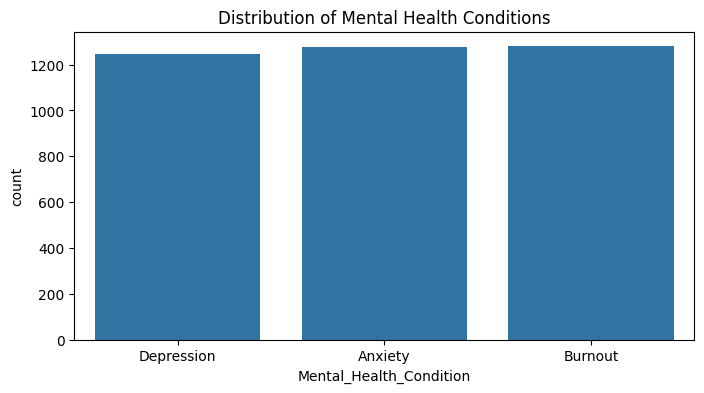

In [37]:
# Visualizing the distribution of 'Mental_health_condition'
plt.figure(figsize=(8,4))
sns.countplot(data=df_remote, x='Mental_Health_Condition')
plt.title('Distribution of Mental Health Conditions')

#### Key Insights

The above graph shows  the counts for Depression, Anxiety, and Burnout that are relatively equal, with each condition affecting a similar number of individuals around 1200 for each.

The high count of individuals with mental health conditions each condition affecting over 1200 individuals indicates that a significant proportion of remote workers face mental health challenges.

This reinforces the need for organizations to address these conditions, as many remote workers may be experiencing either depression, anxiety, or burnout.

Text(0.5, 1.0, 'Hours Worked per Week Vs. Mental Health Condition')

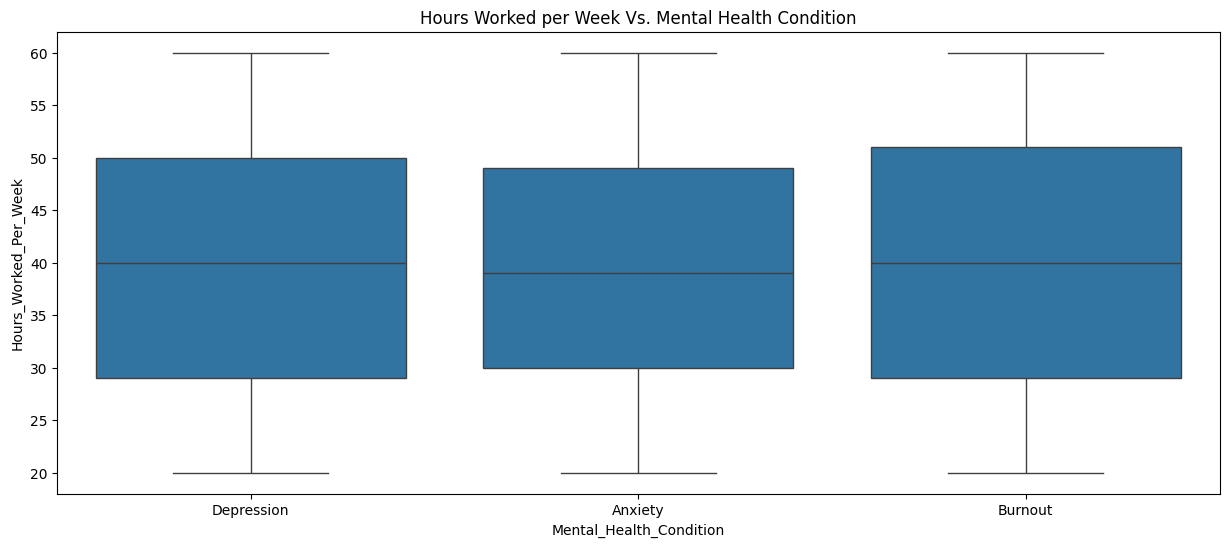

In [38]:
# visualixing the relationship between ''Hours_Worked_per_Week' and 'Mental_health_Conditions'
mental_health_con = df_remote['Mental_Health_Condition']
hrs_wrkd_per_wk = df_remote['Hours_Worked_Per_Week']

plt.figure(figsize=(15,6))
sns.boxplot(data=df_remote, x=mental_health_con, y=hrs_wrkd_per_wk)
plt.title('Hours Worked per Week Vs. Mental Health Condition')

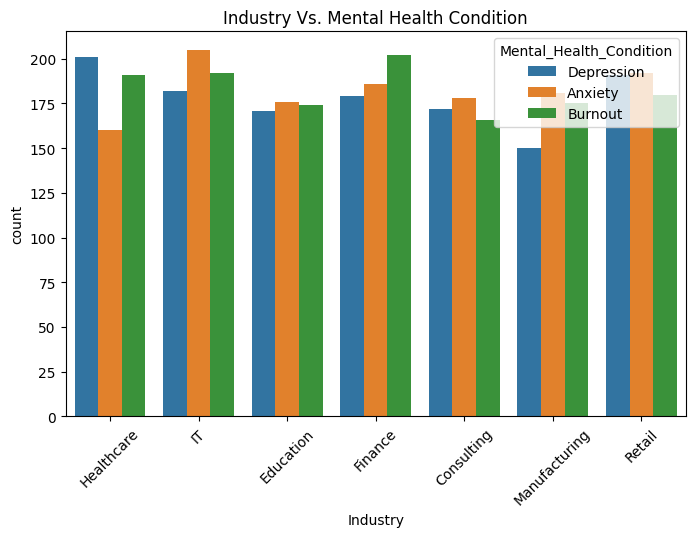

In [39]:
# Countplot to explore how different industries affect mental condition
industry = df_remote['Industry']
plt.figure(figsize=(8,5))
sns.countplot(data=df_remote, x=industry, hue=mental_health_con)
plt.title('Industry Vs. Mental Health Condition')
plt.xticks(rotation=45)
plt.show()

The bar chart  provides insights into the count of individuals suffering from Depression, Anxiety, and Burnout across various industries such as Healthcare, IT, Education, Finance, Consulting, Manufacturing, and Retail.

Across most industries, Burnout appears to have a higher count in several sectors (IT, Consulting, Retail), highlighting how high workloads, long hours, and stressful job environments can lead to burnout.
Anxiety seems particularly prevalent in Finance, while Depression has the highest counts in Healthcare, possibly due to the emotional and psychological challenges in these fields

## Data Preparation

In [40]:
#Drop the fourth class to the target feature
df_filtered = df_remote.dropna(subset=['Mental_Health_Condition']).reset_index(drop=True)

#Check the remaining values to the column
df_filtered['Mental_Health_Condition'].unique()

array(['Depression', 'Anxiety', 'Burnout'], dtype=object)

In [41]:
# Encoding categorical variables using LabelEncoder
label_enc = LabelEncoder()
for col in df_remote.select_dtypes(include='object').columns:
  df_remote[col] = label_enc.fit_transform(df_remote[col])

In [58]:
# Splitting the data into features (X) and target (y)
X = df_remote.drop('Mental_Health_Condition', axis=1) # Feature
y = df_remote['Mental_Health_Condition'] # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standadize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
df_remote.head(10)

Age  Gender  Job_Role  Industry  Years_of_Experience  Work_Location  \
0   32       2         2         3                   13              0   
1   40       0         0         4                    3              2   
2   59       2         6         1                   22              0   
3   27       1         6         2                   20              1   
4   49       1         5         0                   32              1   
5   59       2         5         4                   31              0   
6   31       3         5         4                   24              2   
7   42       2         0         5                    6              1   
8   56       3         0         3                    9              0   
9   30       0         2         4                   28              0   

   Hours_Worked_Per_Week  Number_of_Virtual_Meetings  \
0                     47                           7   
1                     52                           4   
2                     46                          11   
3                     32                           8   
4                     35                          12   
5                     39                           3   
6                     51                           7   
7                     54                           7   
8                     24                           4   
9                     57                           6   

   Work_Life_Balance_Rating  Stress_Level  Mental_Health_Condition  \
0                         2             2                        2   
1                         1             2                        0   
2                         5             2                        0   
3                         4             0                        2   
4                         2             0                        3   
5                         4             0                        3   
6                         3             1                        0   
7                         3             2                        2   
8                         2             0                        3   
9                         1             1                        2   

   Access_to_Mental_Health_Resources  Productivity_Change  \
0                                  0                    0   
1                                  0                    1   
2                                  0                    2   
3                                  1                    1   
4                                  1                    0   
5                                  0                    1   
6                                  1                    0   
7                                  0                    0   
8                                  1                    0   
9                                  1                    0   

   Social_Isolation_Rating  Satisfaction_with_Remote_Work  \
0                        1                              2   
1                        3                              1   
2                        4                              2   
3                        3                              2   
4                        3                              2   
5                        5                              2   
6                        5                              0   
7                        5                              1   
8                        2                              2   
9                        2                              0   

   Company_Support_for_Remote_Work  Physical_Activity  Sleep_Quality  Region  
0                                1                  1              1       2  
1                                2                  1              1       1  
2                                5                  2              2       3  
3                                3                  2              2       2  
4                                3                  1        

## Modeling and Evaluation 

Logistic Regression Accuuracy score: 0.25933333333333336


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.24      0.26       396
           1       0.27      0.36      0.31       374
           2       0.23      0.29      0.26       381
           3       0.26      0.14      0.18       349

    accuracy                           0.26      1500
   macro avg       0.26      0.26      0.25      1500
weighted avg       0.26      0.26      0.25      1500



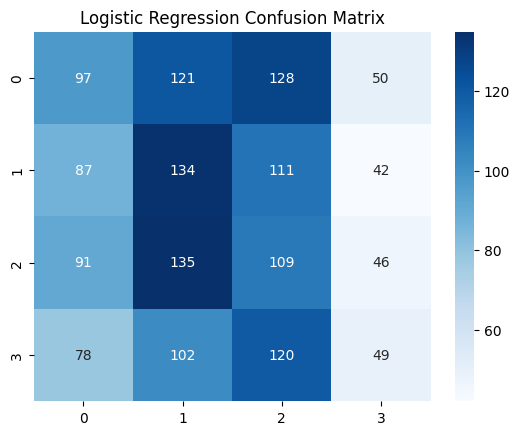

In [60]:
# Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

# Making Prediction
y_pred_logistic = logistic_model.predict(X_test)

#Evaluate the model
print(f"Logistic Regression Accuuracy score: {accuracy_score(y_test, y_pred_logistic)}\n\n")
print(f"Logistic Regression Classification Report:\n{classification_report(y_test, y_pred_logistic)}")

# confusion matrix
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

The Logistic Regression model performed poorly, with an accuracy of 26%, indicating that the model struggles to make correct predictions.
Precision and recall are consistently low across all classes ranging between 0.23 and 0.36, showing that the model has difficulty identifying and classifying positive instances accurately.
The F1-scores are similarly weak, with the highest score being 0.31 for class 1, reflecting poor balance between precision and recall.
The model may be underfitting, and improvements like feature engineering, hyperparameter tuning, or using more advanced models could help enhance performance.

#### Random Forest

Random Forest Accuracy score: 0.24866666666666667


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.26      0.27       396
           1       0.25      0.30      0.28       374
           2       0.24      0.24      0.24       381
           3       0.22      0.18      0.20       349

    accuracy                           0.25      1500
   macro avg       0.25      0.25      0.25      1500
weighted avg       0.25      0.25      0.25      1500



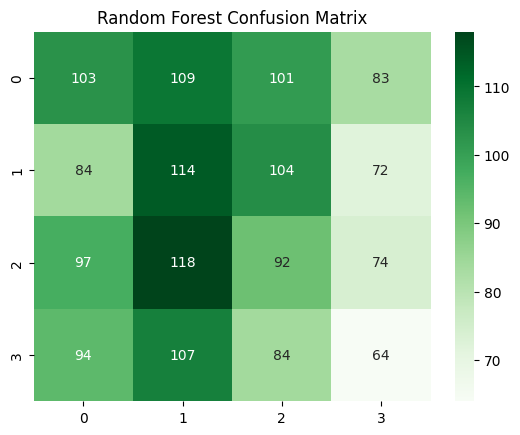

In [63]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # You can adjust n_estimators
rf_model.fit(X_train, y_train)

# Making Prediction
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(f"Random Forest Accuracy score: {accuracy_score(y_test, y_pred_rf)}\n\n")
print(f"Random Forest Classification Report:\n{classification_report(y_test, y_pred_rf)}")

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.show()

#### Linear Regression

Linear Regression Mean Squared Error (MSE): 1.2514411175755744
Linear Regression Root Mean Squared Error (RMSE): 1.1186782904729913
Linear Regression R-squared (R2): -0.008138712860437103


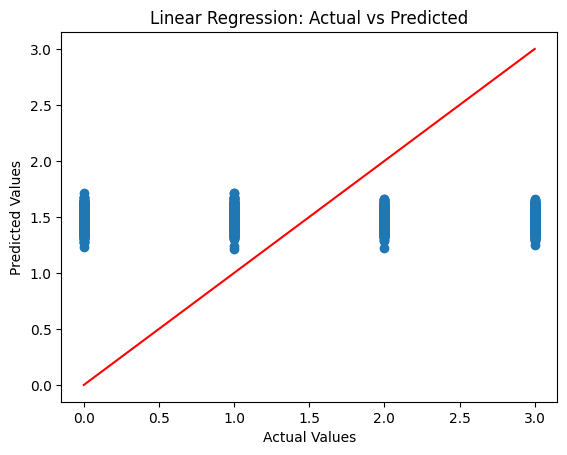

In [67]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Making Predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_linear)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_linear)

print(f"Linear Regression Mean Squared Error (MSE): {mse}")
print(f"Linear Regression Root Mean Squared Error (RMSE): {rmse}")
print(f"Linear Regression R-squared (R2): {r2}")

# Plot actual vs predicted values
plt.scatter(y_test, y_pred_linear)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line showing perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()